# Background

Our bank recently launched a new Product X that has 3 components: savings, insurance, investments. These are represented by `x_savings`, `x_insurance`, and `x_investments` respectively in the company's data.

Now that it has seen a few months of usage, you want to use collected data to get a clearer picture of the product's fund movements. With this, you hope to **understand how best to spend your limited marketing budget to increase adoption for Product X.**

# Data Preparation

We have a CSV file (`demo.csv`) that contains Product X's transactions since its launch. A graph can be plotted immediately to represent these transactions, but it would be too messy to provide any insight.

Some preprocessing is required to get it into a suitable format. First, we can look at some sample data:

In [ ]:
from pymotif import Motif
import pandas as pd
import networkx as nx

# read transaction file
df_txn = pd.read_csv('demo.csv')
df_txn.head(10)

The data is at the customer level, since each row corresponds to 1 transaction made by a single customer. Because we are interested in overall fund movements across the different components of Product X (represented by the `source_type` and `target` columns), we need to aggregate the data. For easier time-series analysis, let's also add a new `month`column to indicate the month in which each transaction occurred.

In [ ]:
# adding a 'month' column
df_txn['month'] = pd.to_datetime(df_txn['date'], format='%Y-%m-%d').dt.strftime('%Y-%m-01')
df_txn.head()

## Aggregation

We add up all the amounts by `age_group`, `month`, `source_type`, and `target`, then rename `source_type` to `source` to indicate that this column represents the source of funds.

In [ ]:
# get aggregated sum of amounts
df_agg = df_txn.groupby(['age_group', 'month', 'source_type', 'target']).amount.agg('sum').reset_index()

# rename source_type col to source now
df_agg.rename(columns={'source_type': 'source'}, inplace=True)

df_agg.head()
# df_agg

The data is now suitable for plotting.

# Plotting (NetworkX)

A common graph visualisation solution in Python is NetworkX, so let's use that to plot the graph.

In [ ]:
g = nx.from_pandas_edgelist(df_agg, create_using=nx.MultiDiGraph, edge_attr=True)

# draw the networkx graph
nx.draw(g)

Because it's a static image, we cannot manipulate the graph and analyse it easily. Any subsequent configuration and analysis has to be done with more code.

To overcome these limitations, we can plot the same graph above into **Motif**, giving us an interactive and flexible platform to work with the graph.

# Plotting (Motif)

In [ ]:
m = Motif(nx_graph=g, title='my first graph')
m

It should look like this:

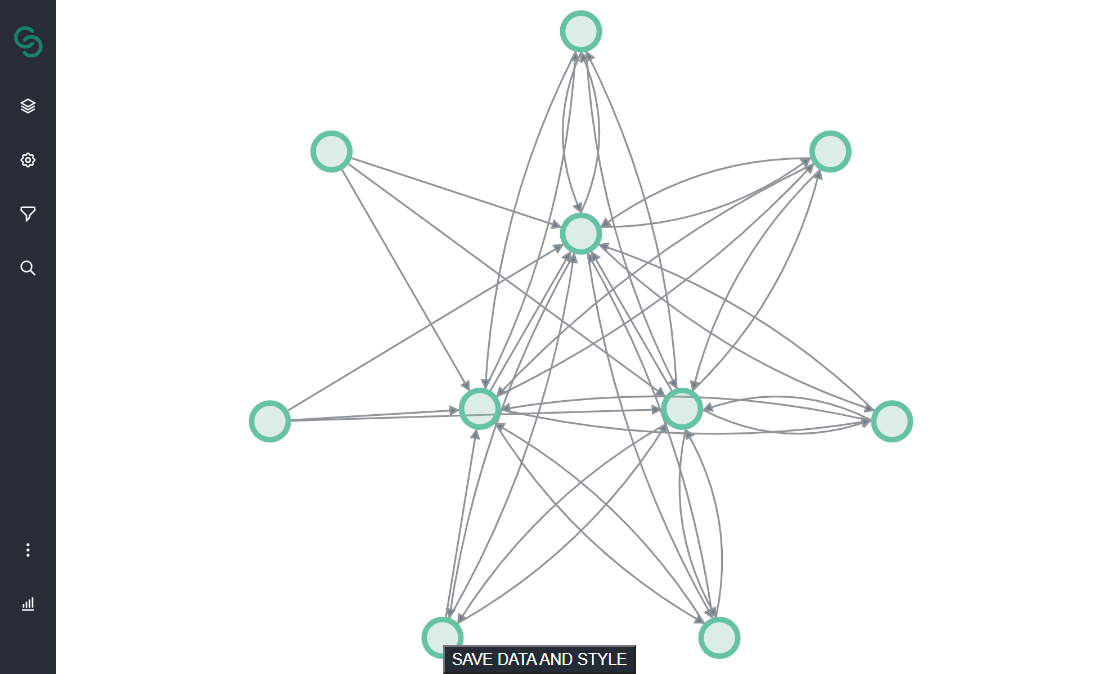

The next few steps will show how with just a few clicks, we can easily investigate individual graph elements, and also configure the graph to our liking.

# Styling

There are multiple styles that can be applied to the graph, either through the user interface, or via code.

## Styling via UI

Let's add some node labels and colours via the UI to better distinguish the groups involved. 

**Steps:**
- Run the cell below
- Click on the `Settings` icon (the gear on the left panel)
- Under `Node Styles`,
  - Set `Label` to `id`
  - Set `Node Color` to `Legend`
  - Set `Variable` to `id`
- Click on the `SAVE DATA AND STYLE` button

Saving the styles allows easy reuse of your current settings.

In [ ]:
m

After completing the steps, it should look like this:

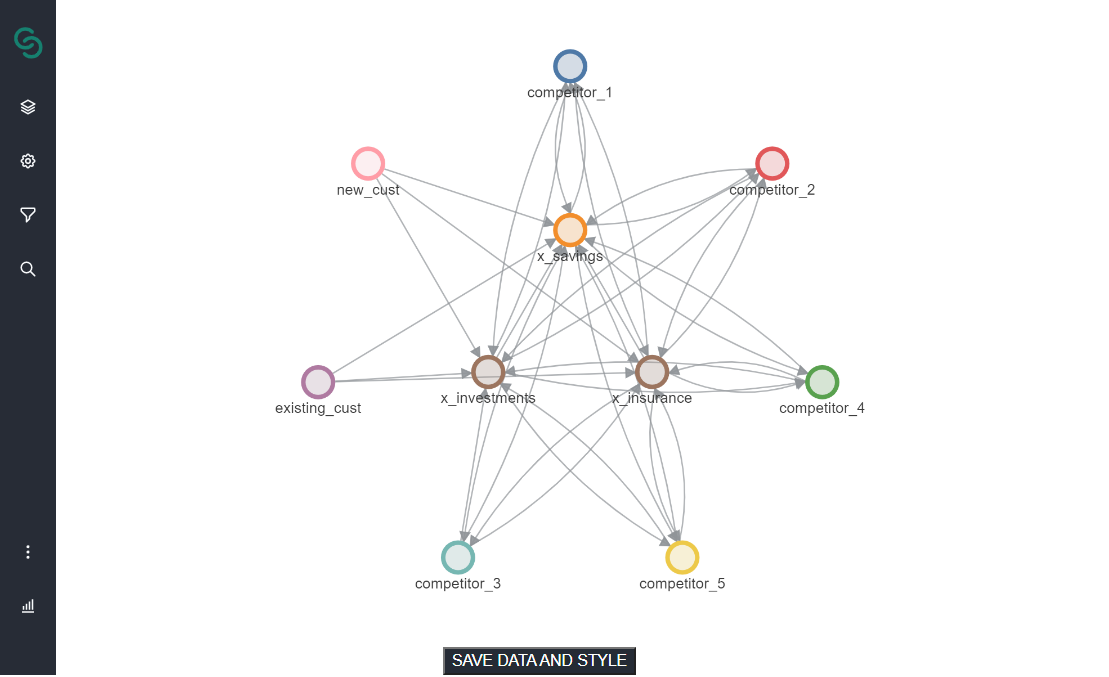

## Styling via code

Styles can also be set with code. Let's change the graph layout to a **force-directed** layout, which makes it easier to see what's going on.

#### Steps:
- Run the cell below
- Click on the `SAVE DATA AND STYLE` button

You should see that the layout changes once the cell is run. Once the nodes stop moving, try adjusting the graph in this way:
- Drag `existing_cust` to the left of `new_cust` at the top.
- Drag `competitor_3` and `competitor_5` to the right of `competitor_4`

This places Product X's 3 components in a line, and lays out the respective connections with other groups. With some minor rearrangement, we now have a better birds-eye view of the data.

In [ ]:
style = {'layout': {'type': 'graphin-force'}}
m.set_style(style)
m

After completing the steps, it should look like this:

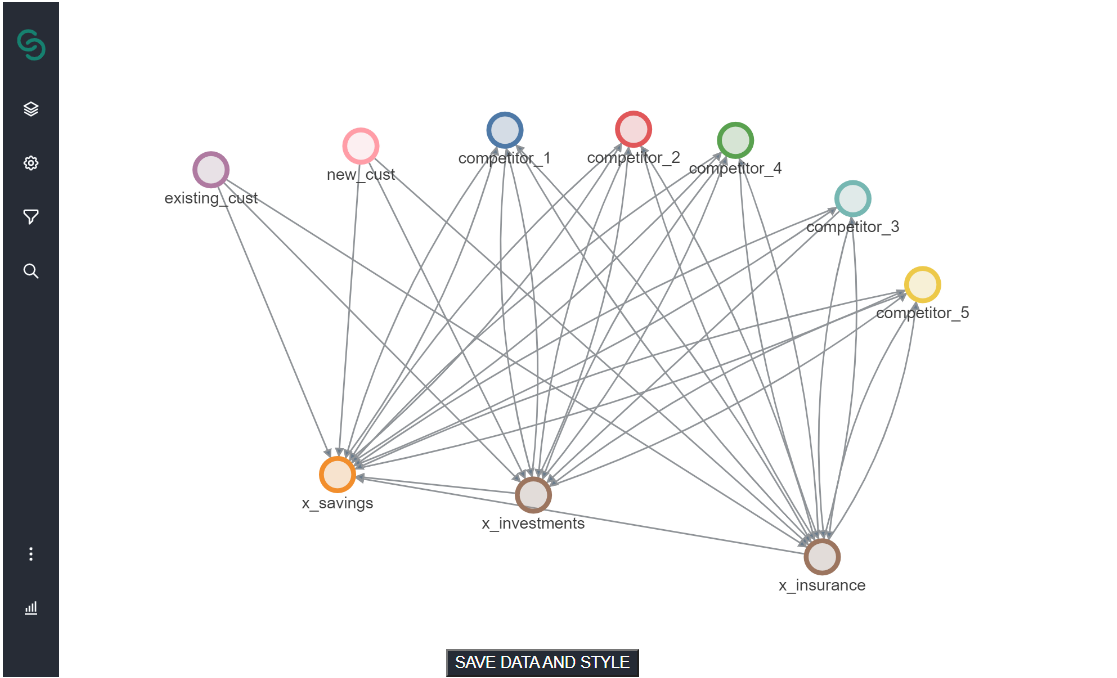

# Data Analysis

Now that data preparation and styling is complete, we can begin analysing the data to answer our business question: **How should we spend our limited marketing budget to increase adoption of Product X?**

## Savings - Incoming Funds

To start, we can investigate funds flowing into Product X's **savings component** i.e. filter down to transactions where the target is `x_savings`.

After filtering, let's also group edges and add edge labels to see the incoming transaction amounts per month. With the variable inspector, we can see how they happened over time.

#### Filtering:
- Run the cell below
- Click on the `Filter` icon on the left (the funnel)
- `Add Filter`
- Select the dropdown, then under `Edges`, select `target`
- Under `Values In`, type `x_savings` and press Enter

(If there are issues selecting the `x_savings` option with the mouse, use arrow keys + Enter instead)

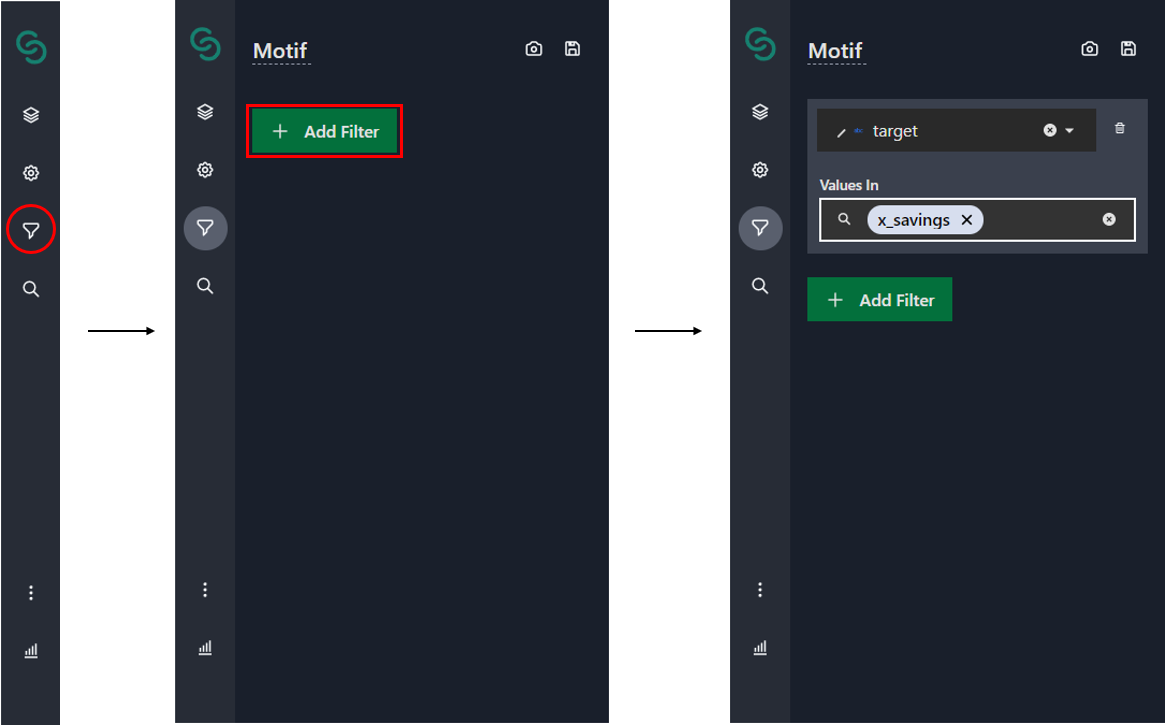

You should see that the graph has been filtered to only have transactions going towards `x_savings`. Click on the `Filter` icon again to hide the side panel.

Now, let's aggregate the data by month.

#### Aggregation:
- Click on the `Layers` icon on the left (the first one)
- Under `my first graph` at the bottom of the side panel, choose `month` in the selector below `Group Edge`.
- Click on `Add Fields` under `Field with Aggregations`
- Select `amount` for the field and `sum` for the aggregation

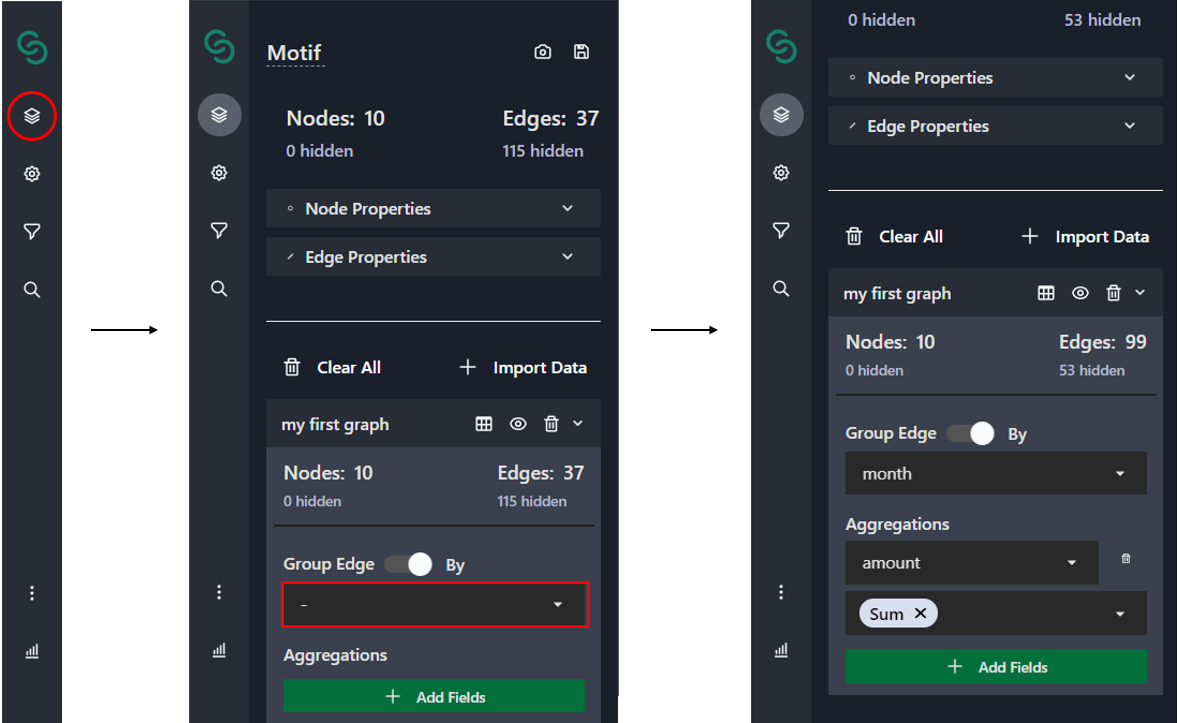

The different incoming transactions over time are shown. We'll add more detail to the graph now.

#### Adding details:
- Under `Layers -> Edge Properties`, hit `Select All`
- Click on the `Settings` icon on the left (the gear)
- Under `Edge Styles -> Edge Width`, choose `Property (user-defined)`
- In the new `Variable` selector that appears right below, select `sum amount` (not `amount`).
- Under `Edge Styles -> Label`, choose `sum amount`.

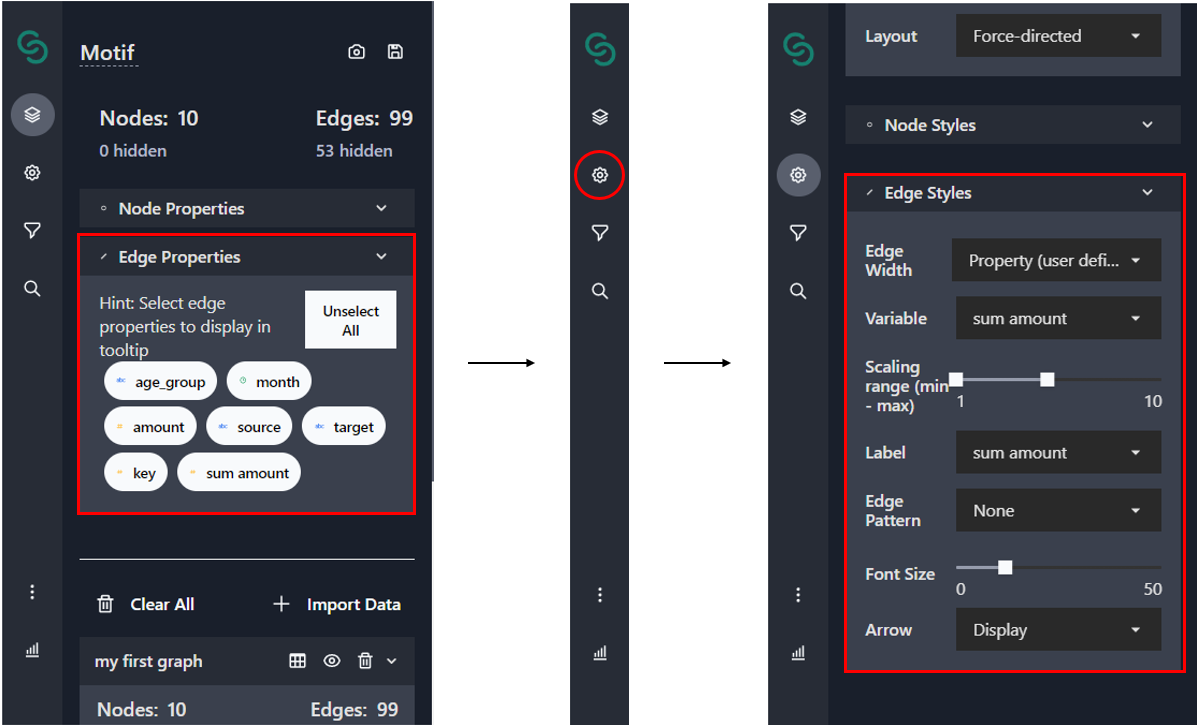

Each grouped edge's thickness now corresponds to its total amount, and clicking on an edge will give you more details about that transaction.

Finally, click on the `Variable Inspector` (bottom left chart icon), select `month` as the variable and play with the time slider to see how the transactions occurred over time.

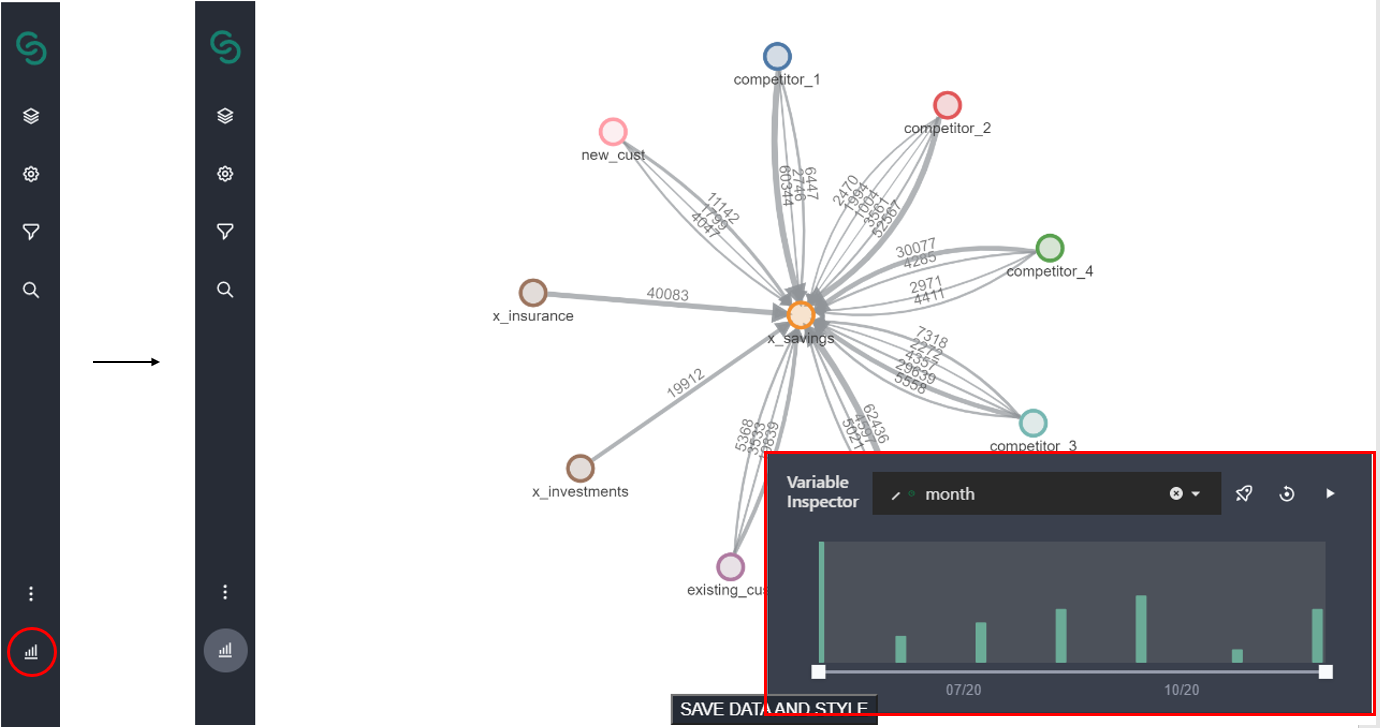


After completing the steps, it should look like this:

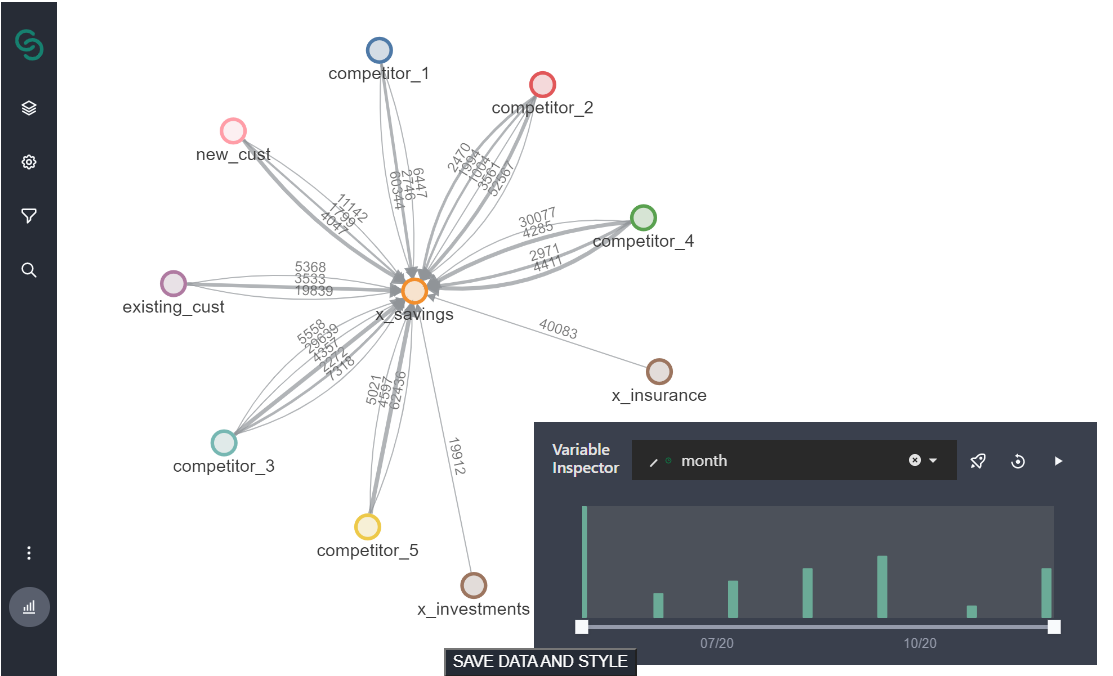

## Try it yourself:

In [ ]:
m

### Observations
- June 2020 saw the most activity, possibly a consequence of heavy marketing efforts before Product X was launched.
- November 2020 was a quiet month, and it would be worth investigating its cause in a separate analysis.

## Savings - Outgoing Funds

We can now look at `x_savings`' outgoing funds by filtering to transactions where source is `x_savings`. Repeat the steps above, but change your filter from `target` to `source`.


After completing the steps, it should look like this:

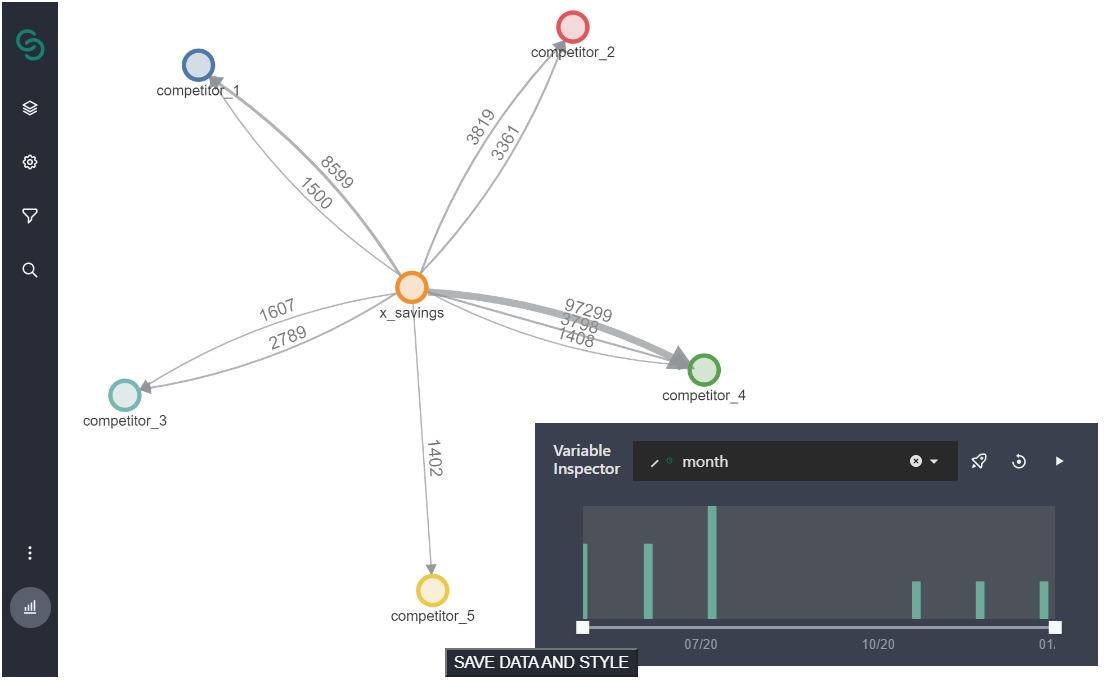

## Try it yourself:

In [ ]:
m

### Observations
What stands out immediately is a large outflow of funds from `x_savings` to `competitor_4` in January 2021, suggestive of customers moving to enjoy better rates elsewhere. A next step here might be to conduct a competitor analysis and evaluate how Product X can react to the new landscape.

## Insurance - Incoming Funds

Repeat the steps above, this time for `target = x_insurance`. You can also try grouping all edges (select `-`) instead of grouping by month.

After completing the steps, it should look like this:

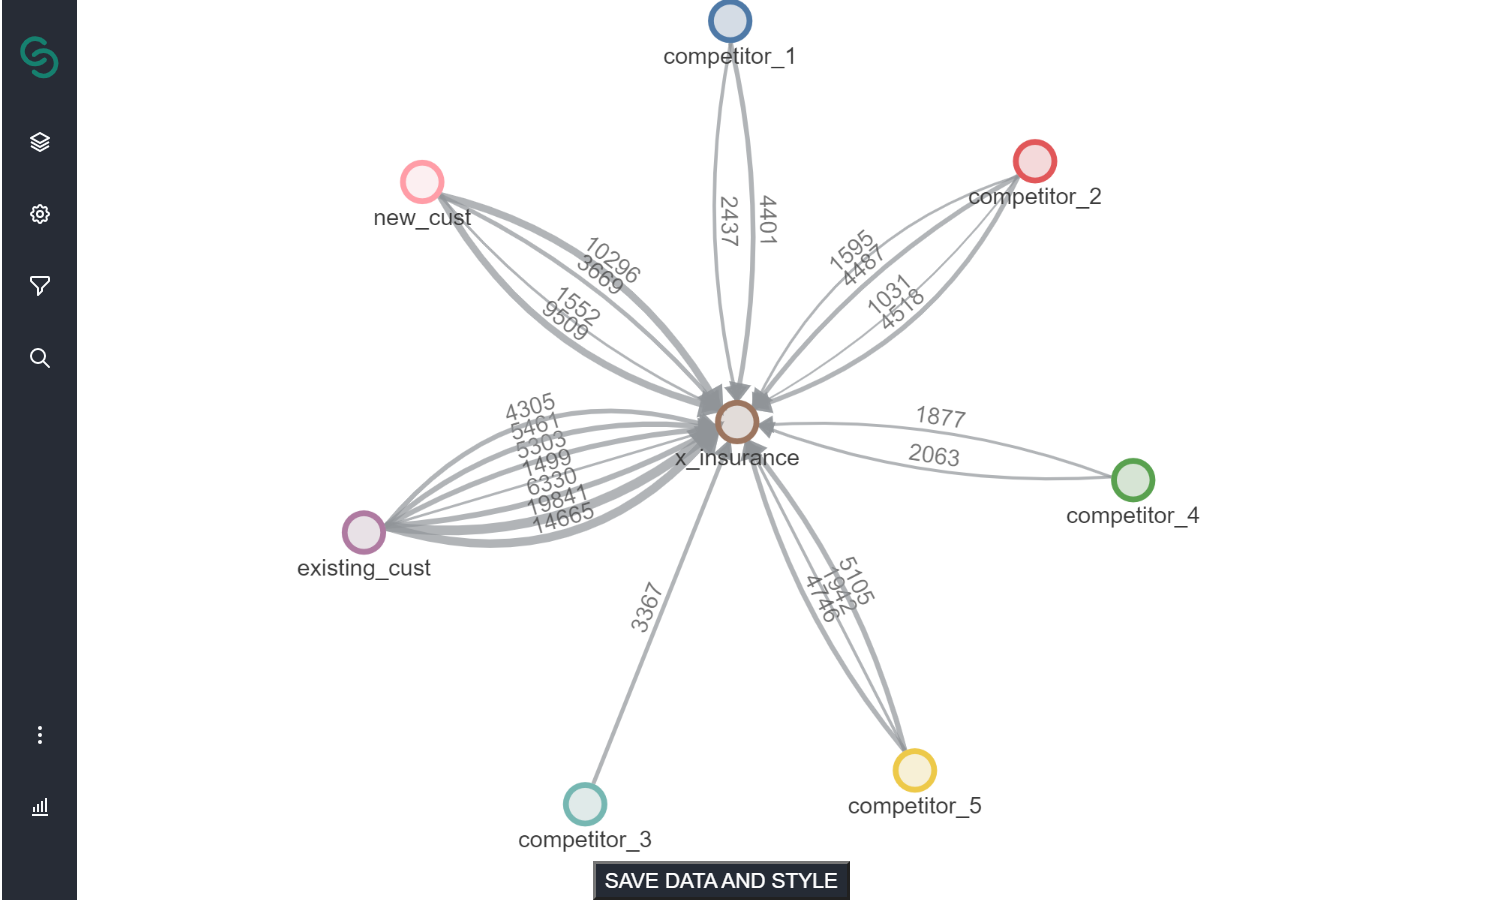

## Try it yourself

In [ ]:
m

### Observations

Majority of inflows turn out to be from existing customers in the bank, suggesting a successful upsell campaign across these few months. With this in mind, the campaign approach could be studied and refined to attract customers from other banks as well.

## Investments - Incoming Funds

Repeat the above for `target = x_investments`, except this time, `Group Edges` by `age_group` instead of `month`.

Alternatively, leave all edges ungrouped, but set `Edge Labels` to `age_group`.

After completing the steps, it should look like this:

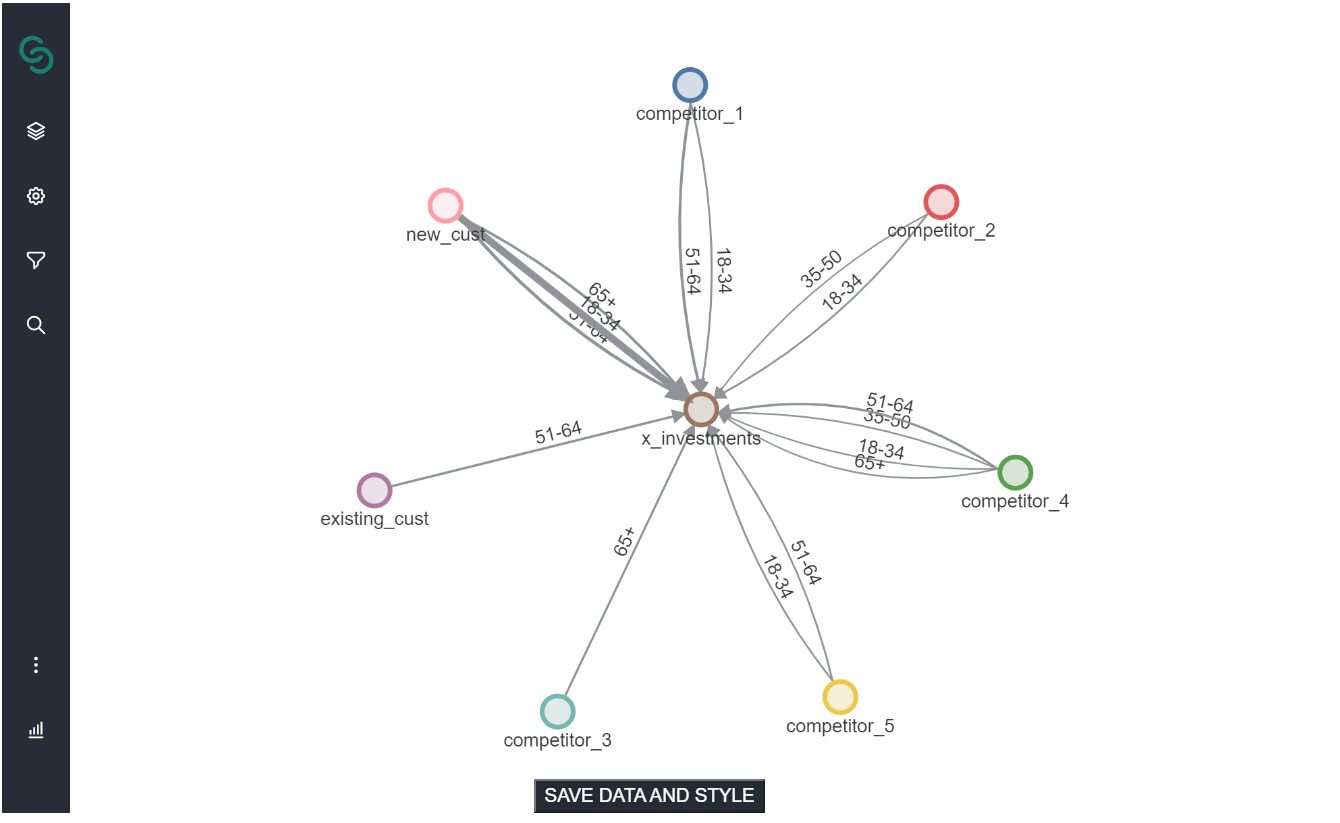

## Try it yourself:

In [ ]:
m

### Observations

The bulk of `x_investment` customers are new to the bank (`new_cust`), and the product is especially attractive to those in the `18-34` age group. With this, we now know how the marketing budget can be used: **Target customers in the 18-34 age group that do not have prior banking relationships with us.**

# Summary

As seen above, we could quickly investigate connections between our data in an intuitive manner through the Motif interface. Through the process of answering a single business question, we derived multiple insights:

**Savings - Incoming Funds**
- High activity in June 2020, possibly a consequence of heavy marketing efforts before Product X was launched?
- November 2020 was a quiet month, and it would be worth investigating its cause in a separate analysis.

**Savings - Outgoing Funds**
- Large outflow of funds from `x_savings` to `competitor_4` in January 2021 highlights the need for deeper competitor analysis and differentiation strategies

**Insurance - Incoming Funds**
- Majority of inflows turn out to be from existing customers in the bank

**Investments - Incoming Funds**
- The main target audience should be new customers aged 18-34

As with most analyses, reproducibility and shareability are important, since other teams may also be involved in the same project. Depending on the audience, there are 2 options available for sharing these insights:
1) For other analysts who may want to furnish the analysis with more data, this notebook can be easily shared and edited

2) For business users that want to investigate further on the interface, the graph state can be saved into a JSON file (`Layers -> Save icon`) and shared with them

With these, other teams can easily pick up from where we left off and continue working on it, leading to a smoother collaboration workflow.